In [ ]:
# import pandas as pd
# df_mi = pd.read_parquet('/datasets/cms/prov_svc_2019_mi.parquet')
# # dtype={'HCPCS_Cd': 'string', 'Rndrng_Prvdr_Zip5': 'string','Rndrng_Prvdr_RUCA': 'float64', 'Rndrng_Prvdr_State_FIPS': 'float64', 'Tot_Srvcs': 'float64'})
# df_mi.dtypes

In [ ]:
%run data_clean.ipynb

In [ ]:
df

,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Drug_Ind,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,md,gender,entity,facility,metro
280,1,0,11,11.0,11,52.0,16.456364,1,0,0,0,1
281,1,0,28,34.0,34,110.0,70.678235,1,0,0,0,1
282,1,0,51,81.0,81,160.0,102.760617,1,0,0,0,1
283,1,0,27,27.0,27,125.0,113.130000,1,0,0,0,1
614,1,0,17,94.0,94,35.0,14.857979,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10139931,1,0,82,83.0,83,170.0,108.206506,1,1,0,0,1
10139996,1,0,34,34.0,34,12.0,2.260000,0,0,0,1,1
10139997,1,0,31,31.0,31,1384.8,239.050645,0,0,0,1,1
10139998,1,0,12,14.0,14,406.0,170.438571,0,0,0,1,1


In [ ]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"entity","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Avg_Sbmtd_Chrg","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
df.count()

Rndrng_Prvdr_Mdcr_Prtcptg_Ind    337351
HCPCS_Drug_Ind                   337351
Tot_Benes                        337351
Tot_Srvcs                        337351
Tot_Bene_Day_Srvcs               337351
Avg_Sbmtd_Chrg                   337351
Avg_Mdcr_Alowd_Amt               337351
md                               337351
gender                           337351
entity                           337351
facility                         337351
metro                            337351
dtype: int64

In [ ]:
dfsplom = df[["md", "metro", 'gender', 'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt']]
# dfsplom = dfsplom.reset_index()
dfsplom.sample(5)


,md,metro,gender,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt
6332475,1,1,0,11,325.294545,128.792727
789078,1,1,0,13,430.000000,141.660000
9703273,1,1,1,24,144.875000,116.058750
786873,1,1,0,80,360.000000,87.765625
1497019,1,1,1,44,31.000000,8.061333


Text(0.5, 0.98, 'Initial Data Exploration')

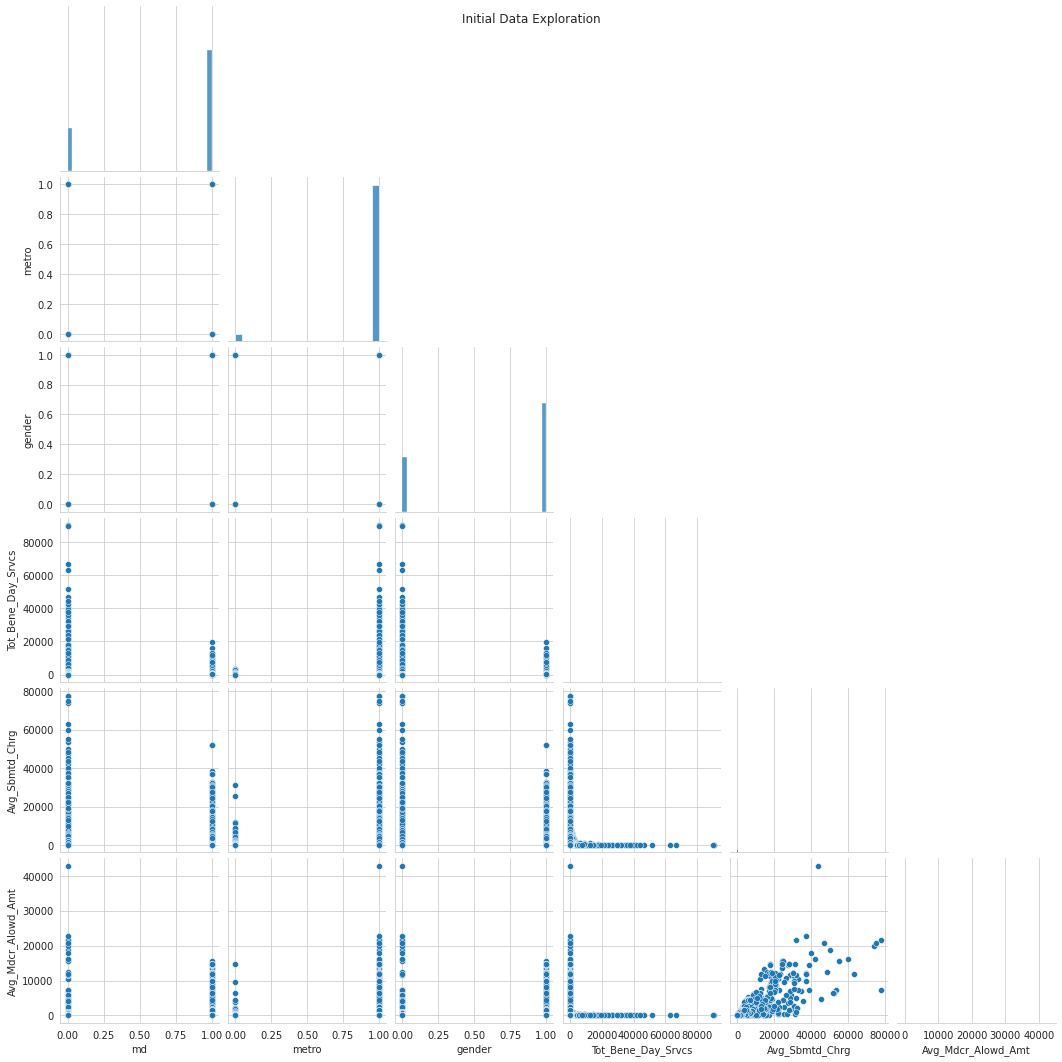

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
f = sns.pairplot(dfsplom, palette="husl", corner=True ) # only show half, the other half is identical
f.fig.suptitle("Initial Data Exploration")


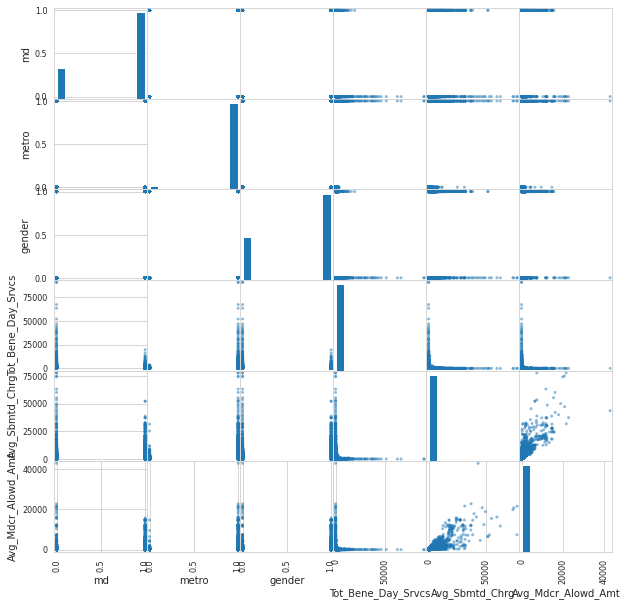

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# scatter_matrix(dfsplom[['Tot_Bene_Day_Srvcs','Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt']], figsize = (10, 10))
scatter_matrix(dfsplom, figsize = (10, 10))
plt.show()

In [ ]:
# explore corelation
corr=df.corr(method='pearson')
corr

,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Drug_Ind,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,md,gender,entity,facility,metro
Rndrng_Prvdr_Mdcr_Prtcptg_Ind,1.000000,0.002854,0.001817,0.000062,-0.001216,0.003331,0.002052,0.013905,-0.001833,0.002130,0.010391,0.001386
HCPCS_Drug_Ind,0.002854,1.000000,-0.024352,0.051145,-0.024434,-0.058458,-0.025777,-0.047633,-0.067438,0.261800,-0.217149,-0.024894
Tot_Benes,0.001817,-0.024352,1.000000,0.234202,0.924567,-0.023098,-0.015361,-0.012577,-0.009415,0.117583,-0.007775,0.002957
Tot_Srvcs,0.000062,0.051145,0.234202,1.000000,0.254037,-0.011227,-0.009257,-0.011814,-0.006437,0.036796,-0.015465,0.000220
Tot_Bene_Day_Srvcs,-0.001216,-0.024434,0.924567,0.254037,1.000000,-0.028945,-0.018398,-0.047003,-0.012915,0.090583,-0.039447,0.001486
Avg_Sbmtd_Chrg,0.003331,-0.058458,-0.023098,-0.011227,-0.028945,1.000000,0.782938,0.014879,0.023490,0.060992,0.162581,0.018095
Avg_Mdcr_Alowd_Amt,0.002052,-0.025777,-0.015361,-0.009257,-0.018398,0.782938,1.000000,0.027555,0.023433,0.059171,0.062851,0.009537
md,0.013905,-0.047633,-0.012577,-0.011814,-0.047003,0.014879,0.027555,1.000000,0.357098,-0.307477,0.170103,0.066560
gender,-0.001833,-0.067438,-0.009415,-0.006437,-0.012915,0.023490,0.023433,0.357098,1.000000,-0.256955,0.099683,0.016726
entity,0.002130,0.261800,0.117583,0.036796,0.090583,0.060992,0.059171,-0.307477,-0.256955,1.000000,-0.084370,-0.038723


In [ ]:
_deepnote_run_altair(corr, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"gender","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Avg_Sbmtd_Chrg","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a38315d-fdd6-44a6-afc3-6dd2e5aaa65e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>